## Step 1: Simulate the Dataset

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

# Set seed for reproducibility
np.random.seed(42)

# Simulate data
n = 5000  # number of users per group

# Conversion rates
conv_rate_A = 0.12  # 12% conversion
conv_rate_B = 0.15  # 15% conversion (hypothetical improvement)

# Generate outcomes: 1 = converted, 0 = not converted
group_A = np.random.choice([0, 1], size=n, p=[1-conv_rate_A, conv_rate_A])
group_B = np.random.choice([0, 1], size=n, p=[1-conv_rate_B, conv_rate_B])

# Create DataFrame
data = pd.DataFrame({
    'group': ['A'] * n + ['B'] * n,
    'converted': np.concatenate([group_A, group_B])
})

# Show first few rows
print(data.head())

  group  converted
0     A          0
1     A          1
2     A          0
3     A          0
4     A          0


## Step 2: Summarize the Results

In [19]:
summary = data.groupby('group')['converted'].agg(['count', 'sum', 'mean'])
summary.columns = ['Total Users', 'Conversions', 'Conversion Rate']
print(summary)

       Total Users  Conversions  Conversion Rate
group                                           
A             5000          578           0.1156
B             5000          718           0.1436


## Step 3: Statistical Significance Test  
Using a Chi-Square Test for categorical data

In [21]:
# Contingency table
contingency = pd.crosstab(data['group'], data['converted'])

# Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency)

# If p < 0.05, the difference is statistically significant.
print(f"Chi-square Statistic: {chi2:.4f}")
print(f"P-value: {p:.4f}") 

Chi-square Statistic: 17.1280
P-value: 0.0000


## Step 4: Visualize the Results

C:\Users\Surface 4\AppData\Local\Temp\ipykernel_9900\428412148.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(x='group', y='converted', data=data, estimator=np.mean, ci=95)


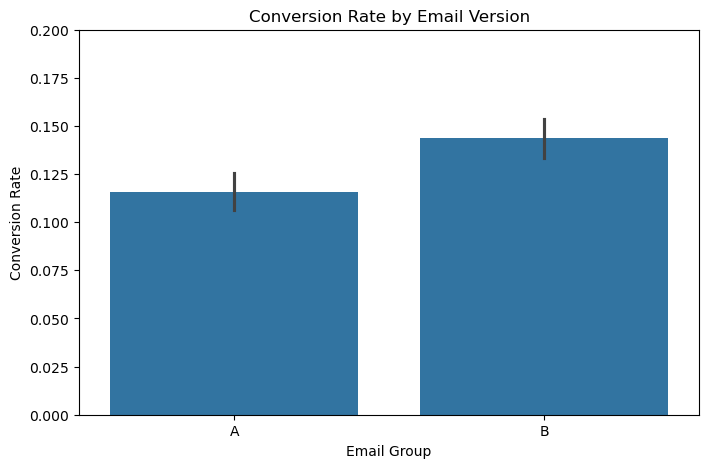

In [23]:
# Plot conversion rates
plt.figure(figsize=(8,5))
sns.barplot(x='group', y='converted', data=data, estimator=np.mean, ci=95)
plt.title('Conversion Rate by Email Version')
plt.ylabel('Conversion Rate')
plt.xlabel('Email Group')
plt.ylim(0, 0.2)
plt.show()

# Confidence Intervals

In [25]:
import statsmodels.api as sm

# Separate groups
conv_A = data[data['group'] == 'A']['converted']
conv_B = data[data['group'] == 'B']['converted']

# Compute proportions and CIs
ci_A = sm.stats.proportion_confint(conv_A.sum(), len(conv_A), alpha=0.05, method='normal')
ci_B = sm.stats.proportion_confint(conv_B.sum(), len(conv_B), alpha=0.05, method='normal')

print(f"Group A CI: {ci_A}")
print(f"Group B CI: {ci_B}")

Group A CI: (0.10673729338716292, 0.12446270661283707)
Group B CI: (0.1338797230701127, 0.1533202769298873)


# ✅ Conclusion: 
Group B had a higher conversion rate.

The Chi-square test showed the difference was statistically significant (p < 0.05).

The company can implement Version B confidently as the better-performing email.